<img src="./img/hu-logo.png" align="right" width="120">

# Machine Learning in Marketing
## Final Assignment 2020/21
This notebook provides a data-driven approach for optimising coupon allocation in a supermarket setting.



In [56]:
# !pip install nb-black
# !pip install pyarrow
# !pip install gensim
# !pip install pickle

  Using cached tsne-0.3.1.tar.gz (547 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'error'
  Using cached tsne-0.3.0.tar.gz (547 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'error'
  Using cached tsne-0.2.0.tar.gz (34 kB)
  Running setup.py clean for tsne
Failed to build tsne
    Running setup.py install for tsne: started
    Running setup.py install for tsne: finished with status 'error'


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\Christopher\anaconda3\python.exe' 'C:\Users\Christopher\AppData\Roaming\Python\Python38\site-packages\pip' install --ignore-installed --no-user --prefix 'C:\Users\Christopher\AppData\Local\Temp\pip-build-env-f44k6a9d\overlay' --no-warn-script-location --no-binary :none: --only-binary :none: -i https://pypi.org/simple -- setuptools setuptools_scm wheel 'cython >= 0.29' 'numpy==1.14.5; python_version<'"'"'3.7'"'"'' 'numpy==1.16.0; python_version>='"'"'3.7'"'"''
       cwd: None
  Complete output (578 lines):
  Ignoring numpy: markers 'python_version < "3.7"' don't match your environment
    Using cached setuptools-53.0.0-py3-none-any.whl (784 kB)
    Using cached setuptools_scm-5.0.1-py2.py3-none-any.whl (28 kB)
    Using cached wheel-0.36.2-py2.py3-none-any.whl (35 kB)
    Using cached Cython-0.29.21-cp38-cp38-win_amd64.whl (1.7 MB)
    Using cached numpy-1.16.0.zip (5.1 MB)
    ERROR: Command errored out with exit s

In [37]:
# import standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

%matplotlib inline
import warnings

warnings.filterwarnings("ignore")

%load_ext lab_black

## I. Data Import

In [9]:
baskets = pd.read_parquet("./data/baskets.parquet")
coupons = pd.read_parquet("./data/coupons.parquet")
coupon_idx = pd.read_parquet("./data/coupon_index.parquet")

In [10]:
baskets.head()

,week,shopper,product,price
0,0,0,71,629
1,0,0,91,605
2,0,0,116,715
3,0,0,123,483
4,0,0,157,592


In [11]:
coupons.head()

,week,shopper,product,discount
0,0,0,35,35
1,0,0,193,40
2,0,0,27,30
3,0,0,177,35
4,0,0,5,30


In [12]:
coupon_idx.head()

,week,shopper,coupon
0,90,0,0
2000,90,0,1
4000,90,0,2
6000,90,0,3
8000,90,0,4


In [32]:
# sampling for playing around
# baskets_origin = baskets.copy()
baskets = baskets_origin  # [0 : round(len(baskets_origin) * 0.3)]

In [33]:
len(baskets)

68841598

## II. Data Preprocessing

In [34]:
def create_baskets(input_purchases):
    input_origin = input_purchases.copy()
    input_purchases = (
        input_purchases.groupby(by=["shopper", "week"])
        .agg({"product": lambda x: list(x), "price": sum})
        .reset_index(drop=False)
    )
    input_purchases = input_purchases.rename(columns={"product": "products"})
    input_purchases["basket_size"] = input_purchases["products"].apply(len)
    return input_purchases, input_origin


# baskets, baskets_origin = create_baskets(baskets)
baskets, _ = create_baskets(baskets)
baskets.head()

,shopper,week,products,price,basket_size
0,0,0,"[71, 91, 116, 123, 157, 167, 171, 184, 207, 225]",5908,10
1,0,1,"[71, 91, 130, 157, 167, 191, 225]",4109,7
2,0,2,"[52, 67, 71, 87, 91, 130, 184, 211, 238]",5108,9
3,0,3,"[71, 91, 123, 130, 179, 184, 214, 225]",4681,8
4,0,4,"[48, 67, 76, 91, 116, 123, 184, 225]",4740,8


In [41]:
with open("baskets_product_list.pickle", "wb") as handle:
    pickle.dump(baskets, handle)

In [117]:
with open('baskets_product_list.pickle', 'rb') as handle:
    baskets = pickle.load(handle)

## III. P2V Approach

In [44]:
# from p2v_module import p2v
import p2v_module
import importlib

importlib.reload(p2v_module)

<module 'p2v_module' from 'C:\\Users\\Christopher\\Nextcloud2\\Documents\\Studium\\HU Berlin\\Master\\3. Semester\\MLiM\\Final Project\\p2v_module.py'>

In [45]:
product_vector_model = p2v_module.p2v(baskets["products"])
product_vector_model.create_product_list()

In [47]:
product_vector_model.train_p2v(vec_dim=30, epochs=100)

Epoch #0
Epoch #5
Epoch #10
Epoch #15
Epoch #20
Epoch #25
Epoch #30
Epoch #35
Epoch #40
Epoch #45
Epoch #50
Epoch #55
Epoch #60
Epoch #65
Epoch #70
Epoch #75
Epoch #80
Epoch #85
Epoch #90
Epoch #95


In [50]:
product_vector_model.get_insights(120)

30-dimensional vector for 120:
[ -4.0551434   -0.60214734   4.7559905    5.750765    -1.6399157
 -11.997843     2.166157     1.0798507    0.36487177  -1.0930599
   6.409193    -7.8431764   -0.9255929    9.030615    -7.7928233
   8.259486    -1.5928658   -8.272969    -3.9538302    7.765076
   1.9163026   -6.792471   -10.3738165   -5.7217884   -1.0205433
  -5.1055846    6.47605      0.03354011  -3.5647185    1.7755107 ]

Most similar products for 120:
[('149', 0.7004163265228271), ('170', 0.6032817363739014), ('15', 0.5726485252380371), ('232', 0.5170433521270752), ('245', 0.48133227229118347), ('207', 0.4728485941886902), ('209', 0.4497781991958618), ('147', 0.41294950246810913), ('219', 0.4087563753128052), ('249', 0.39189520478248596)]


In [118]:
# save backup
with open("product_vector_model.pickle", "wb") as handle:
    pickle.dump(product_vector_model, handle)

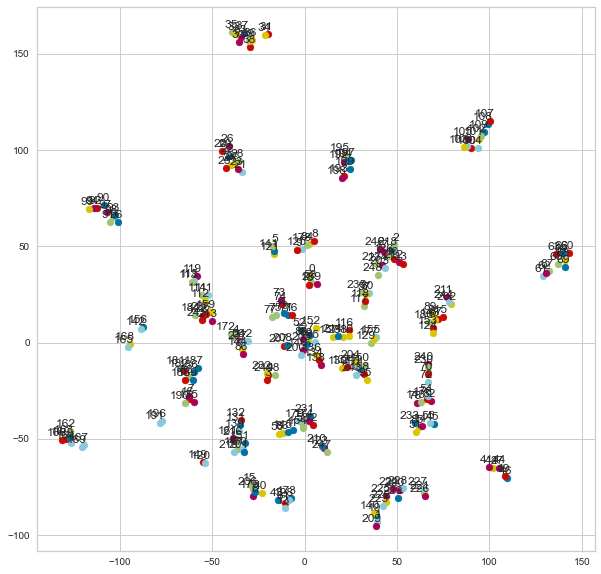

In [109]:
from sklearn.manifold import TSNE

def tsne_plot(model, perplexity, no_iterations):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model.wv[word])
        labels.append(word)

    tsne_model = TSNE(
        perplexity=perplexity,
        n_components=2,
        init="random",
        n_iter=no_iterations,
        random_state=23,
    )
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])

    plt.figure(figsize=(10, 10))

    for i in range(len(x)):
        plt.scatter(x[i], y[i])
        plt.annotate(
            labels[i],
            xy=(x[i], y[i]),
            xytext=(5, 2),
            textcoords="offset points",
            ha="right",
            va="bottom",
        )

    plt.show()
    return x, y, labels


tsne_x, tsne_y, tsne_products = tsne_plot(product_vector_model.p2v_model, 2, 5000)

## IV. Clustering for Categories/Substitutes

In [79]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0).fit(np.column_stack((tsne_x, tsne_y)))

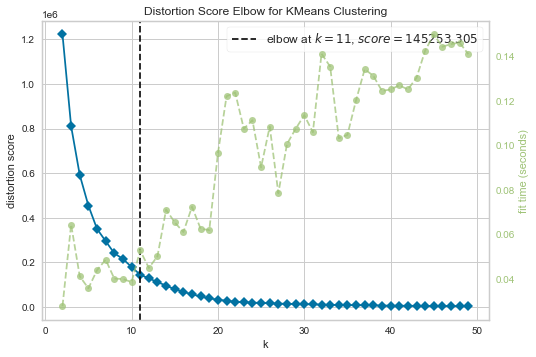

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [86]:
# kmeans.labels_
# !pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 50))
visualizer.fit(np.column_stack((tsne_x, tsne_y)))  # Fit the data to the visualizer
visualizer.show()

<AxesSubplot:>

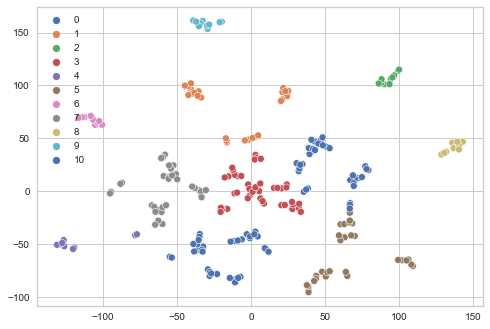

In [101]:
import seaborn as sns

#following the recommendation of 11 clusters
kmeans = KMeans(n_clusters=11, random_state=0).fit(np.column_stack((tsne_x, tsne_y)))
sns.scatterplot(x=tsne_x, y=tsne_y, hue=kmeans.labels_, palette="deep")

<AxesSubplot:>

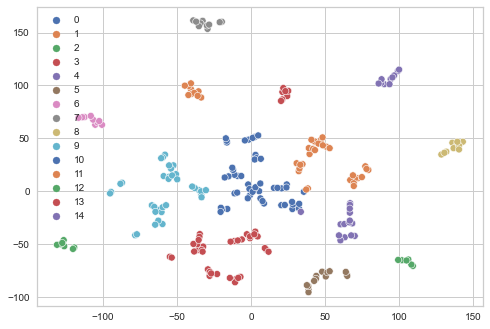

In [104]:
#more categories seem to be ok, too
kmeans = KMeans(n_clusters=15, random_state=0).fit(np.column_stack((tsne_x, tsne_y)))
sns.scatterplot(x=tsne_x, y=tsne_y, hue=kmeans.labels_, palette="deep")

In [128]:
# create dataframe with product <-> category allocation
product_categories = {
    "tsne_x": tsne_x,
    "tsne_y": tsne_y,
    "product": tsne_products,
    "category_label": kmeans.predict(np.column_stack((tsne_x, tsne_y))),
    "tmp_sort": tsne_products,
}
product_categories = pd.DataFrame(data=product_categories)
product_categories["tmp_sort"] = product_categories["tmp_sort"].astype(float)
product_categories = product_categories.sort_values(by="tmp_sort")
del product_categories["tmp_sort"]
product_categories.head(20)

,tsne_x,tsne_y,product,category_label
76,3.079960,34.391747,0,0
65,38.935280,-93.043007,1,5
175,48.395184,50.941959,2,1
206,-20.546894,-19.471403,3,10
37,-37.980141,3.057139,4,9
247,-16.976595,50.057327,5,0
117,-27.971258,-79.929230,6,3
153,-62.646156,-27.723251,7,9
236,4.897214,52.805618,8,0
110,-4.118392,48.045231,9,0


## V. Product frequency

In [129]:
baskets.head()

,shopper,week,products,price,basket_size
0,0,0,"[71, 91, 116, 123, 157, 167, 171, 184, 207, 225]",5908,10
1,0,1,"[71, 91, 130, 157, 167, 191, 225]",4109,7
2,0,2,"[52, 67, 71, 87, 91, 130, 184, 211, 238]",5108,9
3,0,3,"[71, 91, 123, 130, 179, 184, 214, 225]",4681,8
4,0,4,"[48, 67, 76, 91, 116, 123, 184, 225]",4740,8


In [131]:
len(baskets["shopper"].unique())

100000

In [171]:
from scipy.sparse import csr_matrix

total_frequency = csr_matrix((100000, 250), dtype=np.int8).toarray()

In [172]:
# get product frequency per customer
for index, row in baskets.iterrows():
    for p in row["products"]:
        total_frequency[row["shopper"]][p] += 1

In [422]:
total_frequency

array([[ 0,  0,  0, ...,  0,  0, 13],
       [ 6, 13,  0, ...,  0,  0,  6],
       [ 0, 46,  0, ...,  0,  9,  5],
       ...,
       [ 1,  2,  2, ...,  0,  9,  0],
       [ 0, 12,  2, ...,  0, 29,  0],
       [ 0,  0,  0, ...,  0, 53,  0]], dtype=int8)

In [173]:
# save backup
with open("total_frequency.pickle", "wb") as handle:
    pickle.dump(total_frequency, handle)

## VI. Weekly order frequency

In [287]:
# number of weeks between two purchases
90 / total_frequency.mean(axis=0)
# problematic, because too many zeros in total_frequency.
# zero = customer with no preference in this product

array([ 55.67928731,  16.76898855,  53.83773307, 141.80374362,
        41.48153611,  57.35370027,  38.51387783,  39.07929188,
        42.06590325,  46.27249357,  35.75898444,  23.18989951,
        51.93486214,  37.77084846,  55.31857352,  39.79202037,
        30.72983355,  90.73403837, 142.01183432,  45.0409873 ,
        48.95188574,  25.56731021,  19.95981424,  19.30758702,
       107.19773217,  61.34551155,  26.71558587, 194.89800338,
        19.95954865,  39.2161989 ,  55.66654502,  49.24194757,
        30.36283589,  33.5246723 ,  47.56368249,  37.26106343,
        53.62760988,  31.96613011,  21.26588739,  28.34627813,
        14.94785689,  28.65137956,  19.63689205,  44.99257622,
        55.89228935,  19.73407241,  22.1162825 ,  28.75114605,
        16.92852588,  31.7658644 ,  81.12054513,  57.43935362,
        69.9213773 ,  77.95244901, 189.90546928,  59.05240573,
        77.04226196,  88.898547  ,  47.47686821, 138.98111401,
        17.62024841,  47.77678685,  19.75672881,  28.52

In [289]:
# remove the customers with no preference
weeks_frequency = 90 / np.average(
    total_frequency, weights=(total_frequency >= 2), axis=0
)
weeks_frequency
# interpretation: The consumers who "like" product "0" usually buy it every 8-9 weeks

array([ 8.66297992,  5.48733034,  8.65227542, 16.13992441,  8.67178882,
       10.19479734,  8.17960173,  7.86057692,  8.43815432,  6.79831563,
        8.34982252,  6.90411737,  8.82202745,  8.18857235,  9.9568488 ,
        8.66594524,  7.77681464, 12.87443417, 16.54142513,  9.99853802,
        7.02641109,  6.28210721,  4.76086751,  4.82739912, 11.92664238,
        8.03350675,  5.08792366, 12.66474314,  5.42392808,  7.312434  ,
        9.92143095, 10.6453226 ,  6.72235382,  8.40447849,  8.20927516,
        8.72246867, 10.06583424,  7.12881051,  6.36728289,  6.97655857,
        4.19177875,  5.02369191,  4.97894601,  8.86649202,  8.82747058,
        5.44712546,  5.89422076,  7.12942897,  5.28702828,  6.82739899,
       12.90363313, 11.60628584, 14.02620711, 15.48261855, 18.84801403,
       10.82527617, 13.60096207, 14.62288967, 11.50993691, 22.88688093,
        3.90929826,  7.0032024 ,  6.24449984,  6.61423248,  5.46771271,
        5.35216403,  6.7767478 ,  4.52096889,  6.75230196,  6.69

In [296]:
weeks_frequency_stddev = 90 / np.std(
    total_frequency, where=(total_frequency >= 2), axis=0
)
weeks_frequency_stddev

array([ 7.65306781,  5.83708365,  8.07730767, 17.79005305,  8.53981336,
        9.74461454,  7.7097051 ,  7.70950272,  8.25022915,  6.26451149,
        8.9668683 ,  7.78705391,  8.88382106,  8.5413761 , 10.06888296,
        9.4308798 ,  8.53954662, 13.25883274, 18.64576401, 10.78760099,
        5.71054516,  5.57583182,  4.43589298,  4.42648897, 10.30197112,
        6.68149393,  4.6592801 ,  9.9663841 ,  4.98109969,  6.12734113,
        9.30663369, 10.83685736,  6.32293824,  7.8888072 ,  7.53278493,
        8.26309465,  8.93579933,  6.78238695,  6.36590585,  6.36018887,
        4.34510538,  4.71731188,  4.8102963 ,  7.99785413,  7.3806309 ,
        5.3827892 ,  5.57345917,  6.39596456,  5.29097548,  6.19621343,
       18.28998747, 16.90868324, 19.93024152, 21.73364006, 25.92561687,
       16.24388415, 19.02451987, 19.74463066, 17.1613214 , 35.05973826,
        3.74774413,  5.9257556 ,  5.65740884,  5.79556439,  5.13058714,
        4.76510001,  5.93767903,  4.24877272,  5.37096613,  5.68

In [298]:
product_categories["weekly_frequency_mean"] = weeks_frequency
product_categories["weekly_frequency_stddev"] = weeks_frequency_stddev
product_categories

,tsne_x,tsne_y,product,category_label,weekly_frequency_mean,weekly_frequency_stddev
76,3.079960,34.391747,0,0,8.662980,7.653068
65,38.935280,-93.043007,1,5,5.487330,5.837084
175,48.395184,50.941959,2,1,8.652275,8.077308
206,-20.546894,-19.471403,3,10,16.139924,17.790053
37,-37.980141,3.057139,4,9,8.671789,8.539813
...,...,...,...,...,...,...
140,-55.695065,11.731397,245,9,10.781221,10.522864
213,40.855968,48.695030,246,1,6.417084,6.597959
223,11.888278,-57.106277,247,3,11.385853,9.892676
115,39.608067,35.193974,248,1,5.745661,6.527562


## VII.Category differences in order frequency

In [299]:
category_frequency = (
    product_categories[
        ["category_label", "weekly_frequency_mean", "weekly_frequency_stddev"]
    ]
    .groupby(by="category_label")
    .agg("mean")
)

In [300]:
category_frequency

,weekly_frequency_mean,weekly_frequency_stddev
category_label,,
0,9.683828,10.645567
1,9.260205,10.262143
2,6.568726,5.948559
3,9.636289,10.294175
4,6.798629,6.271361
5,7.450772,6.959447
6,7.116626,6.457922
7,8.316382,7.859540
8,5.933996,5.226907


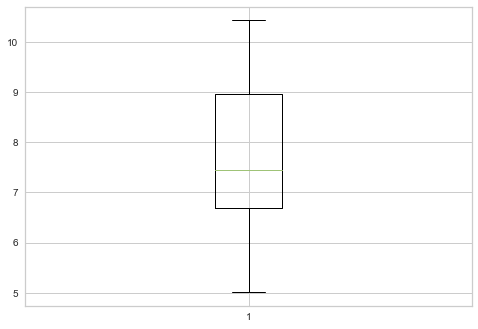

In [428]:
_ = plt.boxplot(category_frequency["weekly_frequency_mean"])

## VIII. Consumers' Preference

In [241]:
total_frequency[2]

array([ 0, 46,  0,  0,  0,  0,  5,  0,  0,  2,  0,  0,  0,  0,  1,  0,  0,
        0,  0,  0,  0,  0,  4,  0, 23,  0,  1,  2,  0,  1,  1,  0,  0,  2,
        0,  0,  0,  0, 25,  0,  2,  0, 14,  0, 13,  0,  0,  0,  0,  0,  3,
       11,  1,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  8,  1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       12,  0,  0, 14,  0,  0,  0,  0,  0,  1,  0,  1, 10,  0,  0,  0, 10,
        0,  0,  0,  0,  2,  0,  1,  0,  0,  5,  0,  0,  0,  6,  0,  0,  0,
       26,  0, 21,  0,  0,  0,  1,  0,  1,  0,  0,  0,  0,  0,  2,  0,  0,
        2,  2,  0,  0,  0, 14,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, 40,  0,  0,  0, 36,  0,  0,  0,  0,  2,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  0,  1,  0,  0,  0,
        0,  0,  1,  0,  4,  1, 31,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,
        0, 24,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 12,  1,  0,  0,
        0,  0,  0,  0,  0

In [255]:
def create_consumer_preferences(min_frequency):
    cons_preferences = dict()
    for consumer in range(0, 100000):
        cons_preferences[consumer] = list()
        for prod in range(0, 250):
            if total_frequency[consumer][prod] >= min_frequency:
                cons_preferences[consumer].append(prod)
    return cons_preferences


preferences = create_consumer_preferences(min_frequency=3)
# once / twice = you didn't like it
# more than two times = seems to be part of your preference

In [256]:
for i in range(5):
    print(f"{i}:\n{preferences[i]}")

0:
[4, 11, 16, 38, 52, 56, 67, 71, 76, 81, 87, 91, 110, 116, 123, 130, 148, 157, 167, 171, 179, 181, 184, 191, 202, 207, 210, 211, 214, 225, 238, 244, 249]
1:
[0, 1, 4, 21, 22, 28, 33, 35, 36, 39, 42, 48, 50, 53, 63, 78, 83, 92, 94, 111, 116, 117, 125, 136, 142, 145, 146, 149, 156, 165, 168, 171, 182, 183, 189, 193, 199, 200, 209, 211, 212, 220, 228, 229, 235, 249]
2:
[1, 6, 22, 24, 38, 42, 44, 50, 51, 63, 85, 88, 97, 101, 111, 115, 119, 121, 141, 160, 164, 181, 191, 193, 205, 217, 228, 230, 240, 248, 249]
3:
[4, 6, 7, 13, 14, 22, 23, 26, 27, 28, 29, 30, 32, 37, 40, 42, 45, 55, 62, 64, 65, 67, 76, 85, 92, 98, 101, 105, 106, 109, 119, 120, 122, 123, 134, 137, 145, 147, 149, 152, 158, 159, 163, 166, 170, 188, 192, 193, 197, 202, 206, 208, 229, 235, 248, 249]
4:
[2, 13, 19, 25, 30, 76, 91, 98, 105, 106, 112, 120, 136, 149, 152, 156, 166, 188, 197, 199, 209, 210, 217, 219, 234]


## IX. Get proper Training/Testing Data

In [265]:
# remove impact of last week (89)
total_frequency_without89 = total_frequency.copy()
for index, row in baskets[baskets["week"] == 89].iterrows():
    for p in row["products"]:
        total_frequency_without89[row["shopper"]][p] -= 1

In [267]:
total_frequency_without89

array([[ 0,  0,  0, ...,  0,  0, 13],
       [ 6, 13,  0, ...,  0,  0,  6],
       [ 0, 46,  0, ...,  0,  9,  5],
       ...,
       [ 1,  2,  2, ...,  0,  9,  0],
       [ 0, 12,  2, ...,  0, 29,  0],
       [ 0,  0,  0, ...,  0, 53,  0]], dtype=int8)

## X. Magical Mechanism?

In [319]:
# maximal window of the past
max(weeks_frequency)

23

In [303]:
weeks_frequency

array([ 8.66297992,  5.48733034,  8.65227542, 16.13992441,  8.67178882,
       10.19479734,  8.17960173,  7.86057692,  8.43815432,  6.79831563,
        8.34982252,  6.90411737,  8.82202745,  8.18857235,  9.9568488 ,
        8.66594524,  7.77681464, 12.87443417, 16.54142513,  9.99853802,
        7.02641109,  6.28210721,  4.76086751,  4.82739912, 11.92664238,
        8.03350675,  5.08792366, 12.66474314,  5.42392808,  7.312434  ,
        9.92143095, 10.6453226 ,  6.72235382,  8.40447849,  8.20927516,
        8.72246867, 10.06583424,  7.12881051,  6.36728289,  6.97655857,
        4.19177875,  5.02369191,  4.97894601,  8.86649202,  8.82747058,
        5.44712546,  5.89422076,  7.12942897,  5.28702828,  6.82739899,
       12.90363313, 11.60628584, 14.02620711, 15.48261855, 18.84801403,
       10.82527617, 13.60096207, 14.62288967, 11.50993691, 22.88688093,
        3.90929826,  7.0032024 ,  6.24449984,  6.61423248,  5.46771271,
        5.35216403,  6.7767478 ,  4.52096889,  6.75230196,  6.69

In [304]:
total_frequency_without89

array([[ 0,  0,  0, ...,  0,  0, 13],
       [ 6, 13,  0, ...,  0,  0,  6],
       [ 0, 46,  0, ...,  0,  9,  5],
       ...,
       [ 1,  2,  2, ...,  0,  9,  0],
       [ 0, 12,  2, ...,  0, 29,  0],
       [ 0,  0,  0, ...,  0, 53,  0]], dtype=int8)

In [309]:
# our target: week 89
baskets[baskets["week"] == 89][["shopper", "week", "products"]].head(5)

,shopper,week,products
89,0,89,"[67, 71, 91, 123, 167, 179, 184, 211, 225, 238]"
179,1,89,"[28, 63, 78, 165, 182, 199, 212]"
269,2,89,"[38, 119, 160]"
359,3,89,"[11, 30, 42, 92, 109, 119, 134, 145, 166, 192]"
449,4,89,"[19, 76, 105, 120, 149, 156, 188, 199, 209]"


In [318]:
week_idx = 89
shopper_idx = 1
baskets[(baskets["week"] == week_idx) & (baskets["shopper"] == shopper_idx)][
    ["products"]
]

,products
179,"[28, 63, 78, 165, 182, 199, 212]"


In [ ]:
# for each product in preferences of consumer:
#     get average weeks
#     for woche88 downto woche88minusAverage:
#         if product in basketsOfConsumer: 
#             # was ist wenn er es gekauft hat?
#             #--> he/she is satisfied!
#         else:
#             # was ist wenn er es nicht gekauft hat?
#             #--> he/she needs it maybe

In [346]:
# get a matrix of weeks since last order for each consumer + product
weeks_since_last_order = csr_matrix((100000, 250), dtype=np.int8).toarray()
weeks_since_last_order = weeks_since_last_order - 1
weeks_since_last_order

array([[-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       ...,
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1]], dtype=int8)

In [347]:
week_idx = 88
shopper_idx = 0

# for the last weeks
while week_idx > 88 - max(weeks_frequency):

    # for each consumer
    for index, row in baskets[(baskets["week"] == week_idx)].iterrows():
        # for each product
        for p in row["products"]:
            if weeks_since_last_order[row["shopper"]][p] == -1:
                weeks_since_last_order[row["shopper"]][p] = 88 - week_idx

    week_idx -= 1

weeks_since_last_order

array([[-1, -1, -1, ..., -1, -1,  3],
       [ 7,  8, -1, ..., -1, -1,  0],
       [-1,  0, -1, ..., -1, -1, -1],
       ...,
       [-1, 18, -1, ..., -1,  0, -1],
       [-1,  8,  3, ..., -1,  0, -1],
       [-1, -1, -1, ..., -1,  0, -1]], dtype=int8)

In [359]:
weeks_since_last_order[1][35:40] # consumer 1

array([16,  0, 20, -1, 12], dtype=int8)

In [360]:
weeks_frequency[34:40] # average consumer

array([ 8.20927516,  8.72246867, 10.06583424,  7.12881051,  6.36728289,
        6.97655857])

In [377]:
consumer_needs_product = csr_matrix((100000, 250), dtype=np.int8).toarray()
rnd_weeks_frequency = weeks_frequency.round()

for cons in range(100000):
    for prod in range(250):
        if weeks_since_last_order[cons][prod] == -1:
            continue
        else:
            consumer_needs_product[cons][prod] = (
                weeks_since_last_order[cons][prod] - rnd_weeks_frequency[prod]
            )

consumer_needs_product

array([[ 0,  0,  0, ...,  0,  0, -3],
       [-2,  3,  0, ...,  0,  0, -6],
       [ 0, -5,  0, ...,  0,  0,  0],
       ...,
       [ 0, 13,  0, ...,  0, -6,  0],
       [ 0,  3, -6, ...,  0, -6,  0],
       [ 0,  0,  0, ...,  0, -6,  0]], dtype=int8)

In [378]:
print(weeks_since_last_order[1][:5])
print(rnd_weeks_frequency[:5])
print(consumer_needs_product[1][:5])
# interpretation for consumer 1:

# product 0 has been bought 7 weeks ago
# product 2 has never been bought

# over all consumers, product 0 is bought on average every 9 weeks

# => consumer doesn't need product 0 right now
# => product 1 should have been bought till now...maybe motivate him?
# => no preference in product 2,3

[ 7  8 -1 -1  1]
[ 9.  5.  9. 16.  9.]
[-2  3  0  0 -8]


In [421]:
print("consumer \tproduct \t overdue")
for idx, consumer in enumerate(consumer_needs_product):
    #     print(np.where(consumer == np.max(consumer)), np.max(consumer_needs_product))
    print(
        f" {idx}  \t\t{np.where(consumer == np.max(consumer))[0]}    \t {np.max(consumer)}"
    )
    if idx > 15:
        break

consumer 	product 	 overdue
 0  		[211]    	 12
 1  		[ 37 154]    	 13
 2  		[180]    	 10
 3  		[165]    	 15
 4  		[88]    	 14
 5  		[171]    	 10
 6  		[76]    	 19
 7  		[248]    	 10
 8  		[189 225]    	 15
 9  		[40]    	 18
 10  		[199]    	 17
 11  		[99]    	 16
 12  		[228]    	 14
 13  		[75]    	 12
 14  		[92]    	 14
 15  		[129 217]    	 13
 16  		[202]    	 16


In [397]:
np.where(consumer_needs_product[0] == consumer_needs_product[0].max())[0][0]

211

### Check with Instacard Data

In [48]:
instacard_prod = pd.read_parquet("../Assignment 2/products.parquet")
instacard_baskets = pd.read_parquet("../Assignment 2/baskets.parquet")

<IPython.core.display.Javascript object>

In [54]:
baskets_prod = pd.merge(
    instacard_baskets, instacard_prod, on="product_id", how="inner"
)[["order_id", "product_id", "product_name"]].sort_values(by="order_id")
baskets_prod.head()

,order_id,product_id,product_name
0,2,33120,Organic Egg Whites
90017,2,30035,Natural Sweetener
90586,2,17794,Carrots
163322,2,40141,Original Unflavored Gelatine Mix
164511,2,43668,Classic Blend Cole Slaw


<IPython.core.display.Javascript object>

In [56]:
baskets_prod = (
    baskets_prod.groupby(by=["order_id"])
    .agg({"product_name": lambda x: list(x)})
    .reset_index(drop=False)
)
baskets_prod.head()

,order_id,product_name
0,2,"[Organic Egg Whites, Natural Sweetener, Carrot..."
1,3,"[Organic Ginger Root, Unsweetened Almondmilk, ..."
2,4,[Nutri-Grain Soft Baked Strawberry Cereal Brea...
3,5,"[Fresh Fruit Salad, Bag of Organic Bananas, Or..."
4,6,"[Cleanse, Clean Day Lavender Scent Room Freshe..."


<IPython.core.display.Javascript object>

In [168]:
len(baskets)

1799279

<IPython.core.display.Javascript object>

In [167]:
len(baskets_prod["product_name"])

3214874

<IPython.core.display.Javascript object>

In [169]:
instacard_model = p2v_module.p2v(
    baskets_prod["product_name"][0 : round(len(baskets_prod["product_name"]) * 0.4)]
)

<IPython.core.display.Javascript object>

In [170]:
instacard_model.train_p2v(vec_dim=100)

Epoch #0
Epoch #5
Epoch #10
Epoch #15
Epoch #20
Epoch #25
Epoch #30
Epoch #35
Epoch #40
Epoch #45
Epoch #50
Epoch #55
Epoch #60
Epoch #65
Epoch #70
Epoch #75


<IPython.core.display.Javascript object>

In [172]:
baskets_prod["product_name"][90]

['French Roast Ground Coffee',
 'Classic Variety Pack Donuts',
 'Half Baked® Ice Cream',
 'Goodness Grapeness Organic Juice Drink',
 'Organic Yokids Lemonade/Blueberry Variety Pack Yogurt Squeezers Tubes',
 'Deep Moisture Body Wash',
 'Peanut Butter Whole Grain Clusters',
 'Epsom Salt Soaking Solution Soothe & Sleep',
 'Uncured Slow Cooked Ham',
 'Purely Pampering Body Wash Shea Butter and Warm Vanilla',
 'Classic Scent Liquid Dish Soap',
 'Hazelnut Spread With Skim Milk & Cocoa',
 'Chocolate Chip Cookie Dough Ice Cream',
 'Oil-Free Acne Wash',
 'Condensed Cream of Mushroom Soup',
 'Bagel Thins Everything',
 'White Distilled Vinegar',
 'YoKids Squeezers Organic Low-Fat Yogurt, Strawberry',
 '3 Minute Miracle Moist Deep Conditioning Treatment',
 'Shampoo, Body Wash, Bubble Bath Coconut+Lemon',
 'Moroccan Argan Oil Renewing Shampoo',
 'Icelandic Style Skyr Blueberry Non-fat Yogurt',
 'Chicken Apple Sausage Egg White Breakfast Burrito',
 'Organic YoKids Smoothie Strawberry Banana Lowfat Y

<IPython.core.display.Javascript object>

In [177]:
instacard_model.get_insights("Apples")

100-dimensional vector for Apples:
[-0.46806958 -1.0799277  -2.7803469   0.9626341  -0.3052549  -1.605334
 -0.01464939  1.4794464   0.5987106   4.3926387   1.8617567   1.0541753
 -3.094165   -2.249914   -1.8997005   1.6010567   1.019675    0.77534354
 -2.3414826   5.3399334  -5.495051    1.1297563   1.2261266  -0.17248106
 -2.2094796   2.7051165  -2.0136747   2.1021743  -3.082506    0.3744591
  0.7661159  -2.0415463  -0.8535184  -2.0154052   3.095544    1.4289329
  0.3794745  -0.13807124  0.40963632 -0.89404994  1.2709929  -0.77517277
  1.5324004  -1.1610694   0.6606574  -1.4896303  -1.5819178   2.4973226
 -1.1216289   1.1205803   3.2657084   1.2162026  -2.0251207   1.2250036
 -1.6453784  -3.0120814   6.4625726   1.4881668   1.9845955   3.1668353
  3.319739   -1.1672952  -0.3296372   0.12663528  0.24737337 -0.73695725
 -0.70990604  1.2030867  -0.97843796  0.2064344   4.153597   -0.1518416
  0.00889189  2.1058302  -2.6531103   2.736032    0.84025073 -2.674615
 -0.6289444  -1.5417254  -0

<IPython.core.display.Javascript object>

## PyTorch Implement

In [187]:
import torch
import torch.nn as nn

<IPython.core.display.Javascript object>

In [188]:
import Prod2Vec
import SkipGramModel

<IPython.core.display.Javascript object>

In [197]:
import torch

x = torch.rand(5, 3)
print(x)

tensor([[0.9373, 0.4401, 0.1357],
        [0.0728, 0.1564, 0.6400],
        [0.6746, 0.7562, 0.1668],
        [0.4994, 0.7015, 0.3352],
        [0.5314, 0.0899, 0.6440]])


<IPython.core.display.Javascript object>

In [196]:
import torch

torch.cuda.is_available()

False

<IPython.core.display.Javascript object>

In [190]:
p2v = Prod2Vec.Prod2Vec(baskets["products"], 'model_test.txt', iteration=1)
p2v.train()

NameError: name 'DataHandler' is not defined

<IPython.core.display.Javascript object>

In [ ]:


from gensim.models.keyedvectors import KeyedVectors
from gensim.test.utils import datapath
from pathlib import Path

model = KeyedVectors.load_word2vec_format(Path.cwd() / 'model_test.txt', binary=False)

print('51')
print(model.most_similar(positive='51'))
print('----------------')
print('261')
print(model.most_similar(positive='261'))
51
[('55', 0.9976743459701538), ('59', 0.997184157371521), ('57', 0.9963715076446533), ('47', 0.9962741136550903), ('46', 0.9962729215621948), ('45', 0.9961555600166321), ('52', 0.995842456817627), ('50', 0.9953503012657166), ('54', 0.9952225089073181), ('49', 0.9950535297393799)]
----------------
261
[('266', 0.9976708292961121), ('255', 0.9970864057540894), ('257', 0.9960516691207886), ('260', 0.996031641960144), ('267', 0.9949982166290283), ('269', 0.9943369626998901), ('265', 0.994239330291748), ('256', 0.9938695430755615), ('268', 0.9931102991104126), ('259', 0.9927456378936768)]
#tsne plotting function

def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model.wv[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=2, n_components=2, init='pca', n_iter=1000, random_state=23)
    #very low perplexity; possible reasoning: "With perplexity 2, local variations dominate" --> very clear clusters
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(10, 10)) 
    
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom'
                    )
    
    plt.show()

tsne_plot(model)